<a href="https://colab.research.google.com/github/BryanMLData/weekly-data-projects/blob/main/AKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1. Analyse Exploratoire des Données (EDA)

### Objectifs :

* Comprendre en profondeur la structure et les caractéristiques du jeu de données.
* Identifier les facteurs influençant le prix.
* Préparer des hypothèses pour la modélisation.

---

## Analyse de forme

### Questions à traiter :

* Quelle est la variable cible à prédire (ici : le prix) : SalePrice
* Combien y a-t-il de lignes et de colonnes : (1460, 81)
* Quel est le type de chaque variable (quantitatives / qualitatives) :
object	43 /int64	35 / float64	3
* Y a-t-il des variables constantes (même valeur partout) ou quasi-constantes : Oui pas mal de variables quasi constante( >30%)
* Certaines colonnes sont-elles redondantes ou inutiles (par exemple : identifiants, doublons de sens) : Non pas de sens mais bcp de colonnes inutiles car trop mal équilibré
**Conseil :** `df.describe()`, `df.dtypes.value_counts()`, `df.nunique()` et `df.var()` sont utiles ici.

---

## Analyse des valeurs manquantes

### Questions à traiter :

* Quelles colonnes contiennent des valeurs manquantes, et en quelle proportion : PoolQC	/ Fence /	MiscFeature	 / MiscVal plus de 80%
* Ces colonnes peuvent-elles être regroupées par nature (ex : caractéristiques physiques, localisation, etc.) : BSM / Garrage / Lot
* Quelles colonnes sont les plus touchées : garrage mais légerement 3 a 0.05
* Quelle stratégie proposes-tu pour les traiter (suppression, imputation, modèle…) : supprimer les collones a plus de 80% , fillnan pour les colonnes a moins de 1% et on verra pour les autres(17, 59, 47) lors du preprocessing

**Conseil :** `df.isnull().mean().sort_values(ascending=False)` t’aidera à prioriser.

---

## Analyse de la variable cible (le prix)

### Questions à traiter :

* Quelle est la distribution de la variable prix (asymétrique, outliers, etc.) : asymetrie vers la droite
* Y a-t-il des valeurs extrêmes ou aberrantes : Oui pas mal
* Faut-il appliquer une transformation (log, box-cox) pour mieux modéliser : Oui on garde pour le preprocessing

**Conseil :** `sns.histplot(your_target)`, `np.log1p()` pour transformer si nécessaire.

---

## Signification et qualité des variables explicatives

### Questions à explorer :

* Quelles variables semblent bien corrélées au prix : OverallQual	0.790982/
GrLivArea	0.708624 /GarageCars 0.640409
GarageArea	0.623431
TotalBsmtSF	0.613581
1stFlrSF	0.605852
* Les variables quantitatives sont-elles sur des échelles similaires ou faut-il les normaliser : oui pas de variables spécialement standarisée
* Certaines variables qualitatives sont-elles déséquilibrées (ex : une seule modalité domine) : Oui Utilities / condition2 / street / AreaPool
* Certaines variables sont-elles difficilement interprétables (codes, valeurs mal nommées) : Oui plusieurs , je sais pas la signification, recherché l'encondage mais pas de problème pour le modèle

**Conseil :** Vérifie les modalités avec `df[col].value_counts()` pour les qualitatives.

---

## Relations entre variables explicatives et prix

### Questions à explorer :

* Quelles variables quantitatives montrent une relation linéaire ou non-linéaire avec le prix :
* Certaines variables qualitatives influencent-elles significativement le prix :
* Observe-t-on des effets d’interaction (ex : surface + localisation) :
* Certaines variables ont-elles un impact très fort ou très faible :

**Conseil :** `sns.scatterplot()`, `sns.boxplot(x='cat_var', y='prix')`, ou `df.corr()` pour les premières explorations.

---

## Relations entre variables explicatives

### Questions à explorer :

* Y a-t-il des variables très corrélées entre elles (multicolinéarité) : Oui 12 variables
* Peut-on regrouper certaines variables (ex : équipements, dimensions) : Plus au moins mais elle non pas la meme nature au sein du groupe
* Certaines variables sont-elles redondantes et pourraient être supprimées : Oui plus au moins , on a des variables avec un fort taux de similitudes, il serait intéressant de voir l'impact de chacune d'entre elle(par groupe) sur la target et voir si on peut les fusionner ou en selectionné 1 ou 2 représentative si elle n'on pas d'impact sur la target

**Conseil :** Heatmap de corrélation `sns.heatmap(df.corr())` ou test VIF (Variance Inflation Factor).


## Hypothèses statistiques à tester

### Hypothèses à formuler :

* Quelles variables ont une influence significative sur le prix :
* Existe-t-il des groupes (ex : types de biens, zones) avec une différence moyenne significative de prix :
* Faut-il segmenter le modèle (par zone géographique, par gamme de prix) :

**Conseil :** ANOVA (`ols + anova_lm`), test de corrélation de Pearson, ou tests de normalité.

---

## Résumé attendu

| Partie                 | Tâches à effectuer                                            |
| ---------------------- | ------------------------------------------------------------- |
| Forme                  | Décrire dimensions, types, unicité, constance                 |
| Valeurs manquantes     | Identifier, comprendre, proposer des stratégies               |
| Variable cible         | Étudier sa distribution, transformations éventuelles          |
| Variables explicatives | Explorer, visualiser, détecter relations fortes               |
| Relations              | Analyser liens croisés entre variables et avec la cible       |
| Hypothèses             | Proposer des hypothèses concrètes pour guider la modélisation |

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#pour afficher toutes les lignes et colonnes a chaques output
pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DataScience/Datasets/Data/DataHachraf.csv')
df = data.copy()

In [ ]:
display(df.head())
print(df.shape)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

(1460, 81)


In [ ]:
#remet l'indexe sur la colonne ID
df.set_index('Id', inplace=True)

object     43
int64      34
float64     3
Name: count, dtype: int64


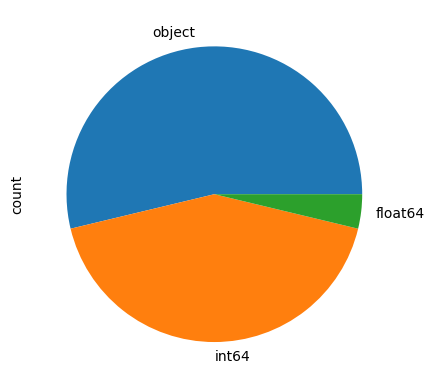

In [ ]:
#types de variables
pd.set_option('display.max_columns', None)
df.dtypes.value_counts().plot.pie()
print(df.dtypes.value_counts())

In [ ]:
#proportion des Nan
df.isnull().mean().sort_values(ascending=False)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
MasVnrType       0.597260
FireplaceQu      0.472603
LotFrontage      0.177397
GarageQual       0.055479
GarageType       0.055479
GarageFinish     0.055479
GarageCond       0.055479
GarageYrBlt      0.055479
BsmtExposure     0.026027
BsmtFinType2     0.026027
BsmtQual         0.025342
BsmtFinType1     0.025342
BsmtCond         0.025342
MasVnrArea       0.005479
Electrical       0.000685
BldgType         0.000000
Neighborhood     0.000000
LandSlope        0.000000
Condition2       0.000000
Condition1       0.000000
LandContour      0.000000
LotShape         0.000000
Street           0.000000
LotArea          0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotConfig        0.000000
Utilities        0.000000
HouseStyle       0.000000
Foundation       0.000000
ExterQual        0.000000
ExterCond        0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating          0.000000
BsmtFinSF1       0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofMatl         0.000000
RoofStyle        0.000000
YearRemodAdd     0.000000
OverallQual      0.000000
YearBuilt        0.000000
OverallCond      0.000000
BsmtHalfBath     0.000000
BsmtFullBath     0.000000
GrLivArea        0.000000
LowQualFinSF     0.000000
2ndFlrSF         0.000000
1stFlrSF         0.000000
CentralAir       0.000000
HeatingQC        0.000000
BsmtFinSF2       0.000000
Fireplaces       0.000000
TotRmsAbvGrd     0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
Functional       0.000000
FullBath         0.000000
HalfBath         0.000000
GarageCars       0.000000
GarageArea       0.000000
BedroomAbvGr     0.000000
PavedDrive       0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
OpenPorchSF      0.000000
WoodDeckSF       0.000000
PoolArea         0.000000
ScreenPorch      0.000000
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
dtype: float64

In [ ]:
#visualisation des nan
df = df[df.columns[df.isna().mean() <0.8]]
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False)
plt.show()

<ipython-input-9-170549b3b1b6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-9-170549b3b1b6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-9-170549b3b1b6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0

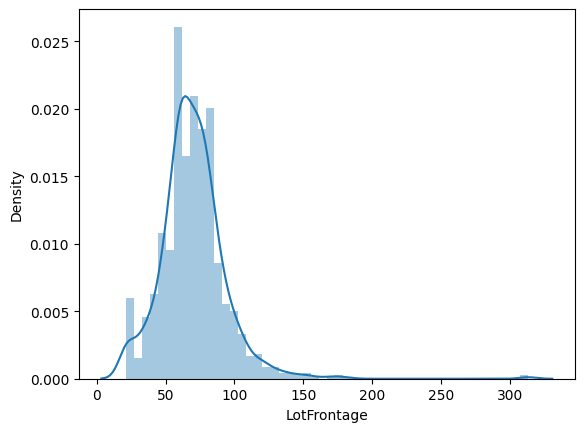

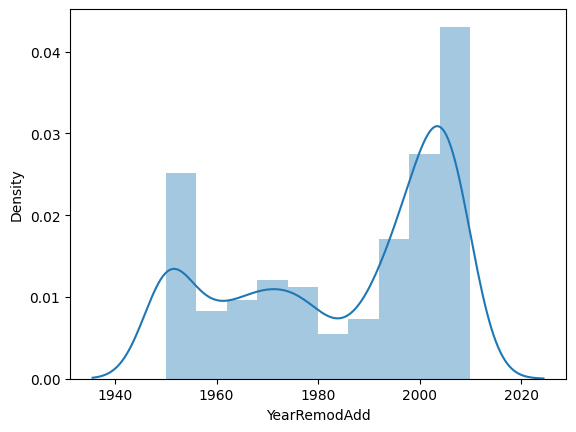

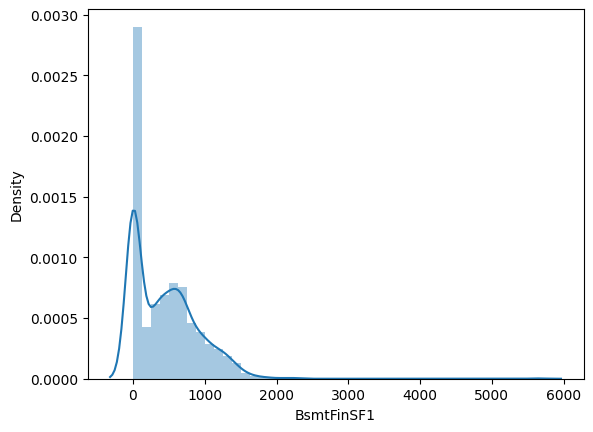

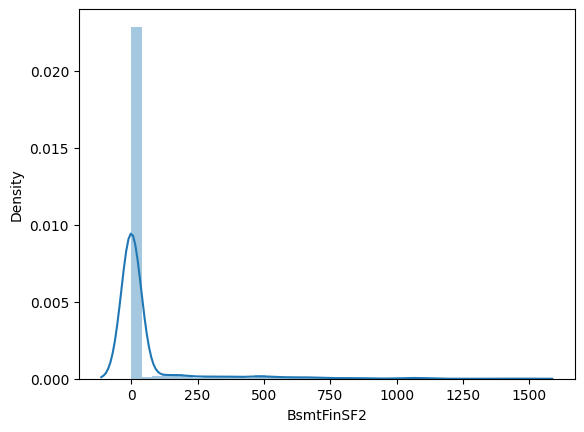

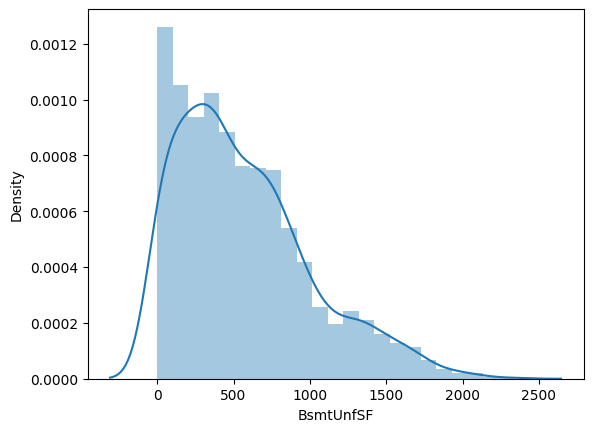

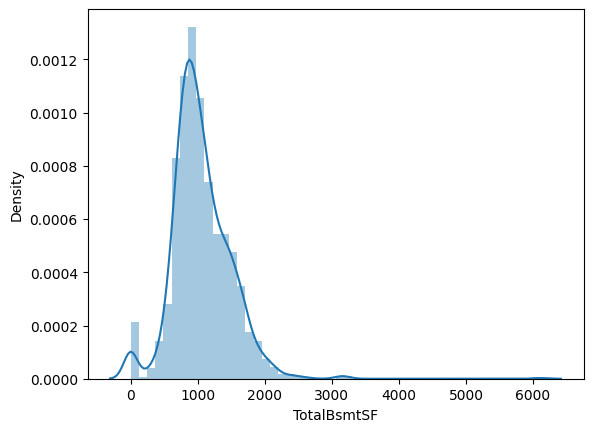

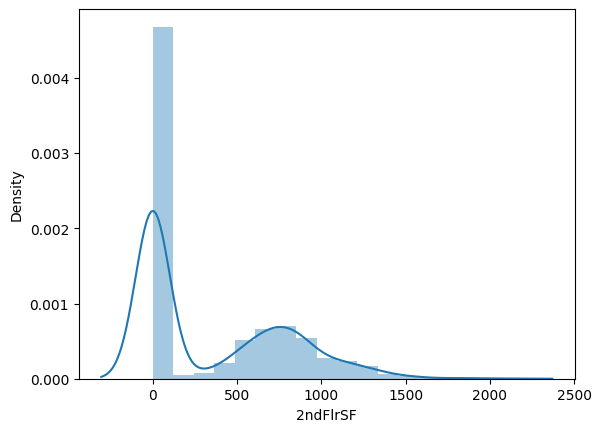

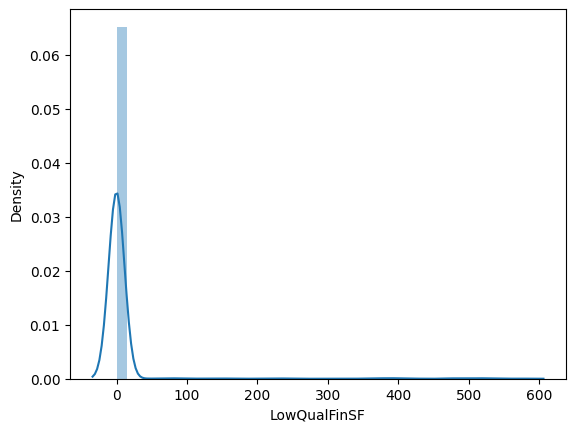

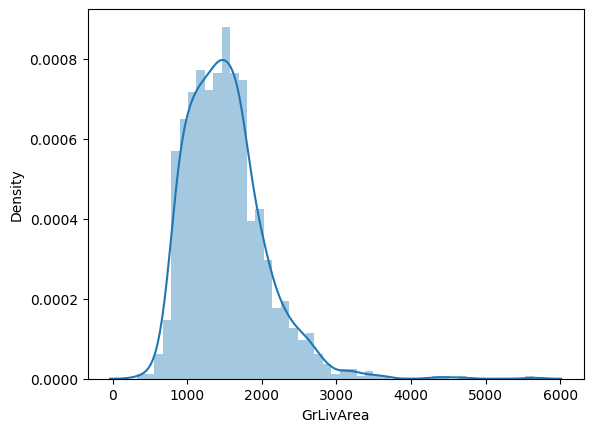

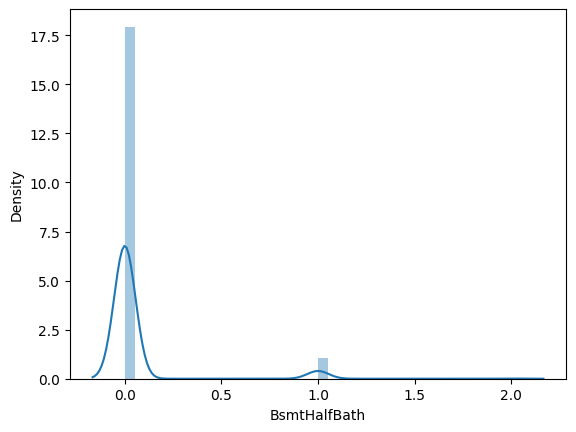

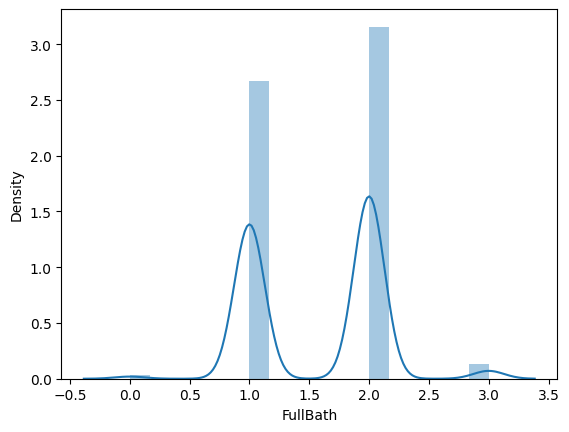

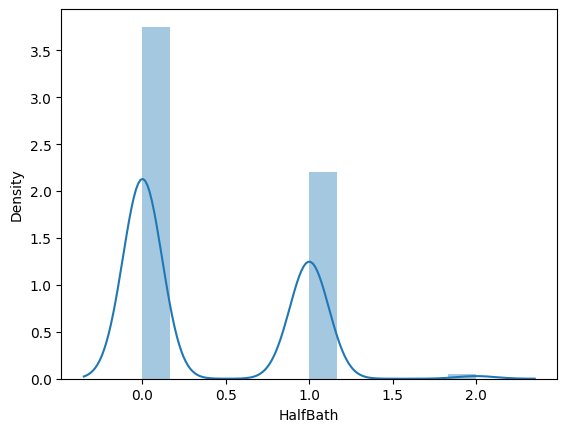

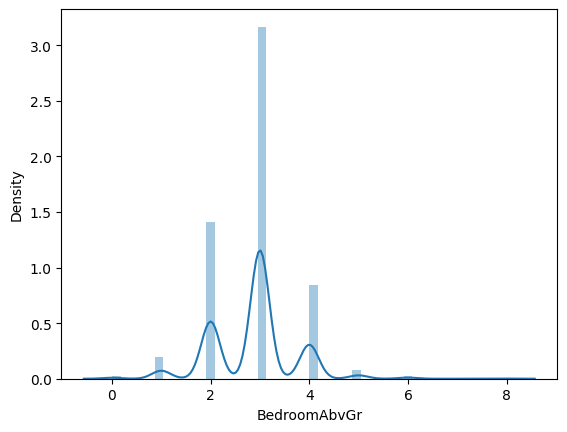

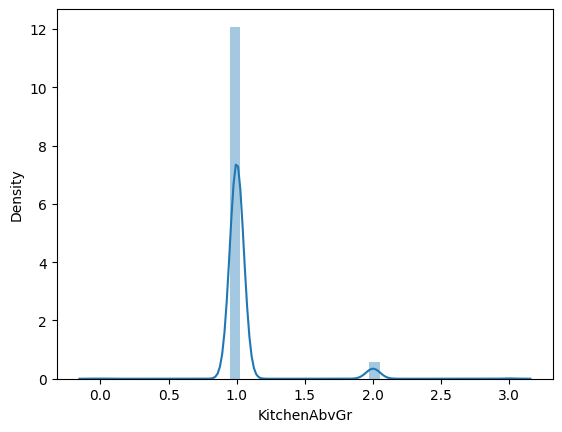

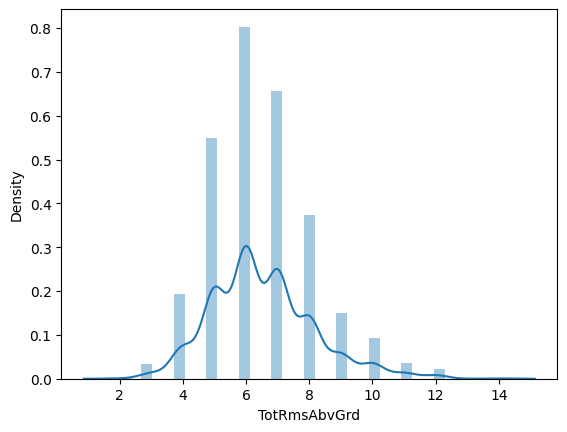

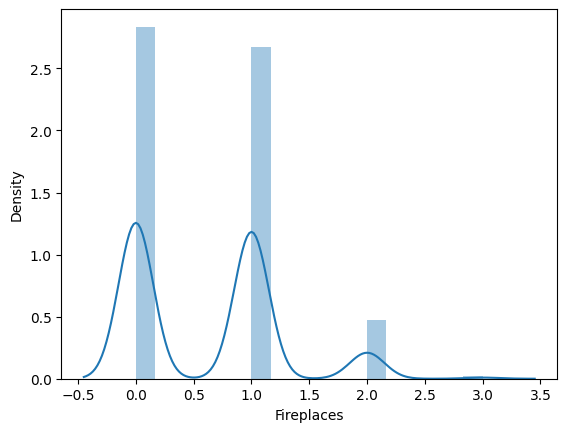

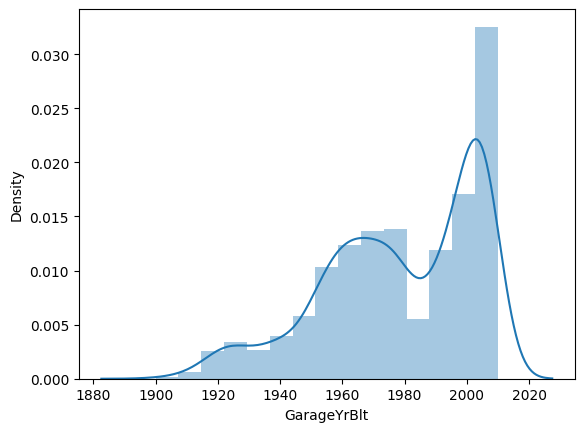

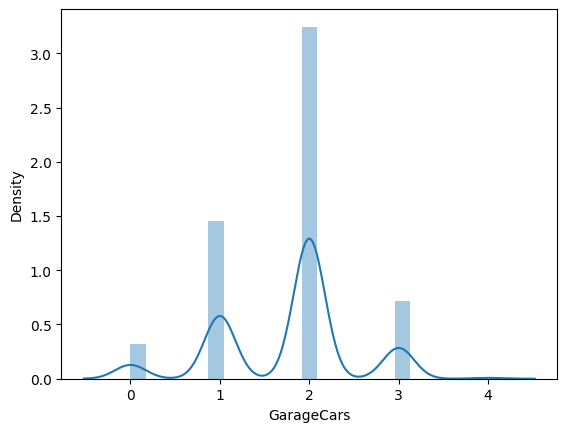

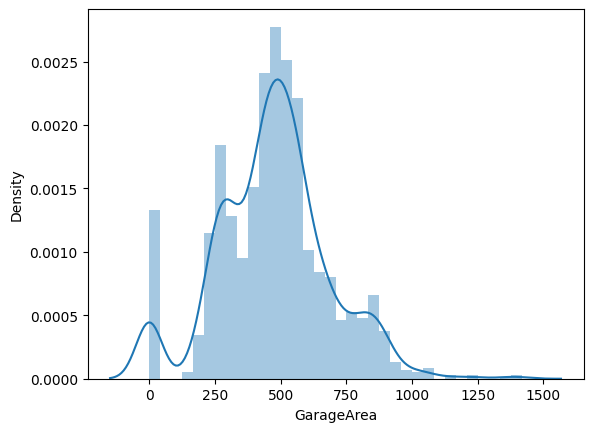

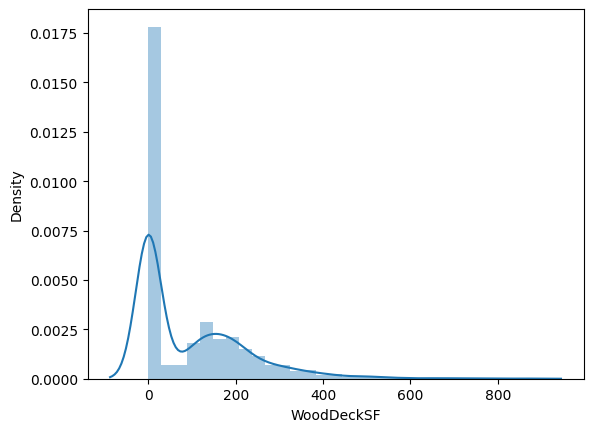

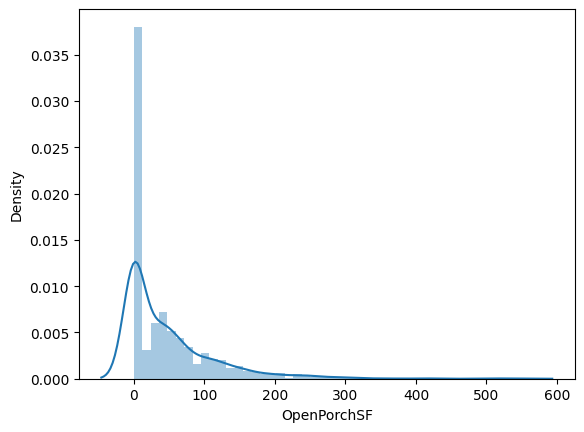

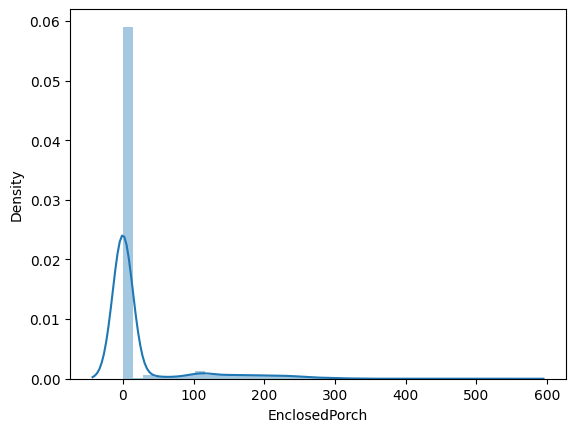

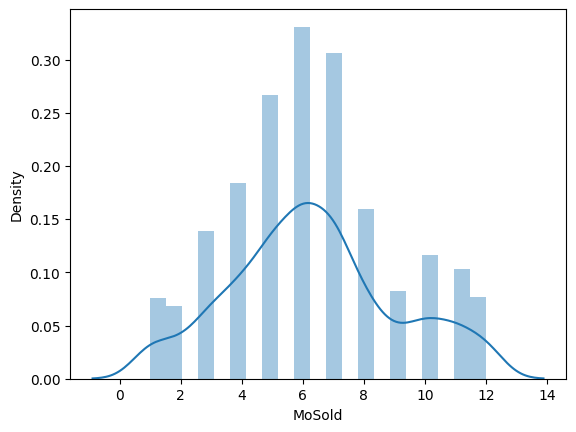

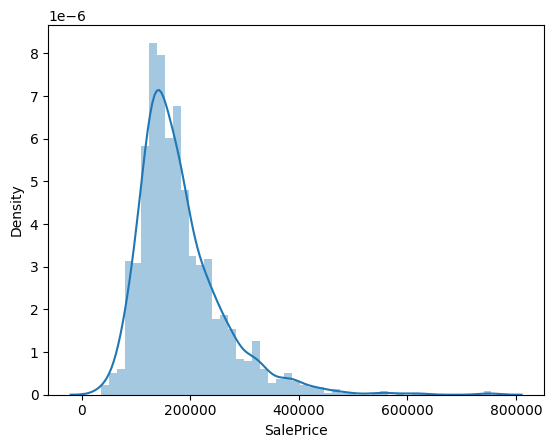

In [ ]:
for col in df.select_dtypes('number'):
    plt.figure()
    sns.distplot(df[col])

In [ ]:
#verification des valeurs uniques et pas de cols unitiles
for col in df:
  n = len(df[col].unique())
  if n < 15 :
    print(f"{col :-<50} {df[col].unique()}")

MSZoning------------------------------------------ ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street-------------------------------------------- ['Pave' 'Grvl']
LotShape------------------------------------------ ['Reg' 'IR1' 'IR2' 'IR3']
LandContour--------------------------------------- ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities----------------------------------------- ['AllPub' 'NoSeWa']
LotConfig----------------------------------------- ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope----------------------------------------- ['Gtl' 'Mod' 'Sev']
Condition1---------------------------------------- ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2---------------------------------------- ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType------------------------------------------ ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle---------------------------------------- ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual-

<ipython-input-13-57b4a433168d>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


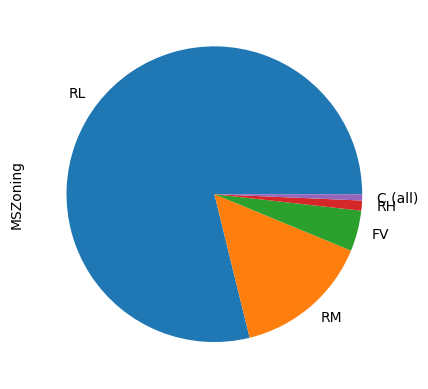

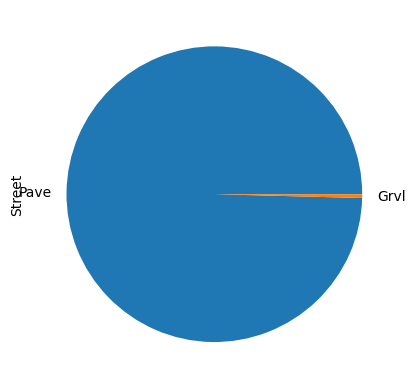

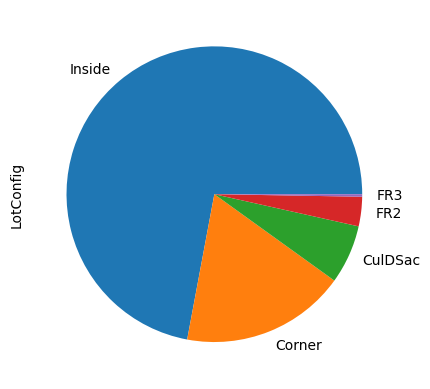

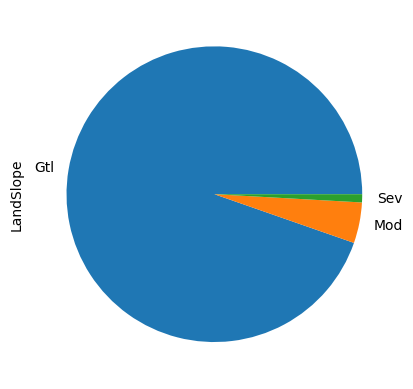

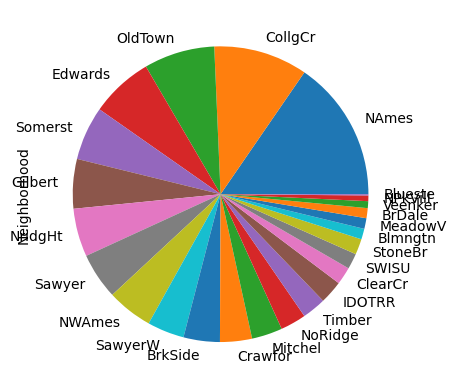

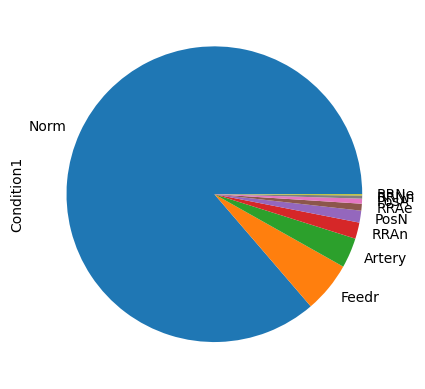

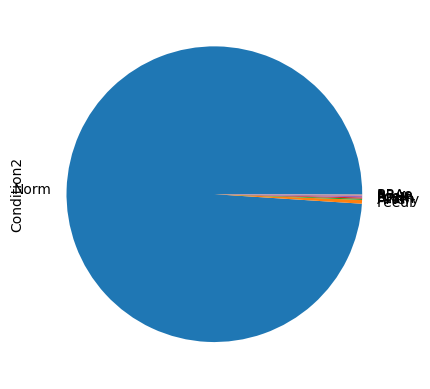

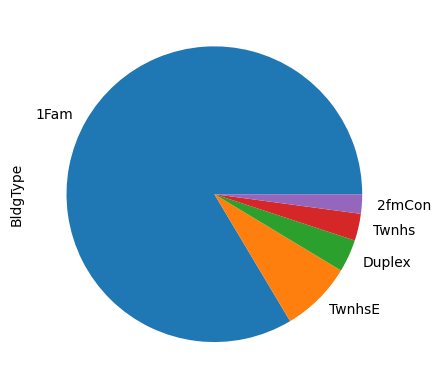

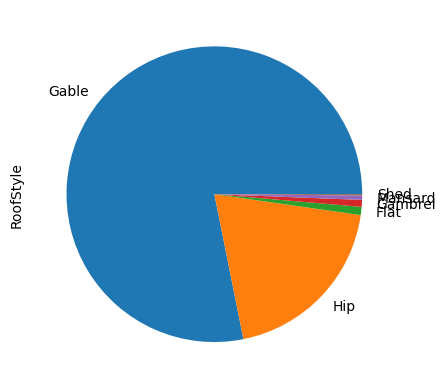

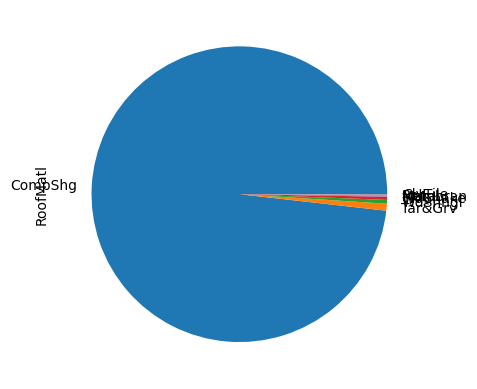

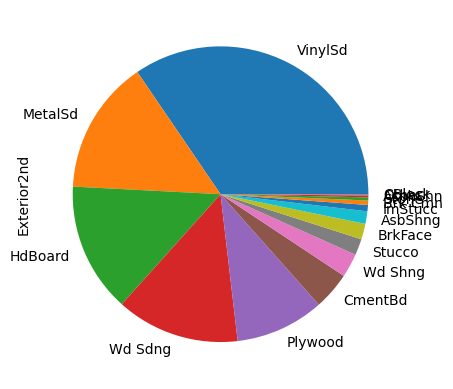

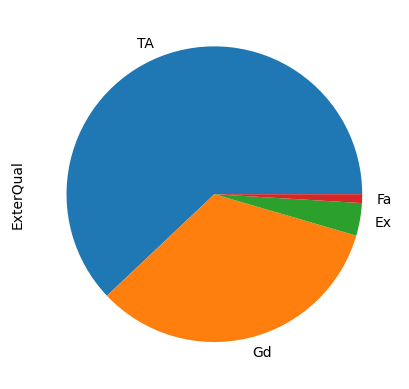

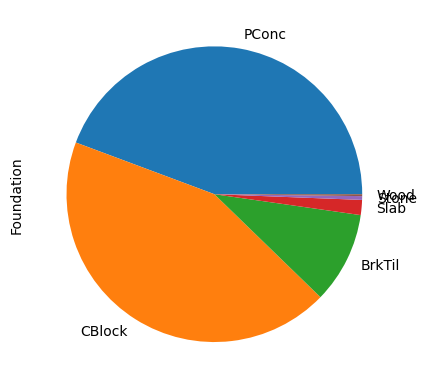

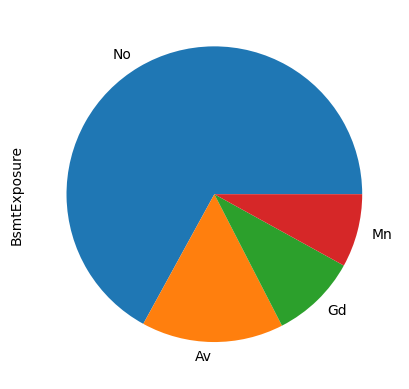

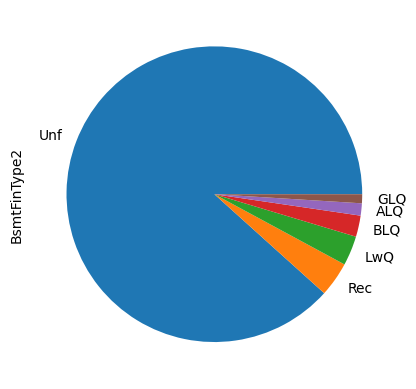

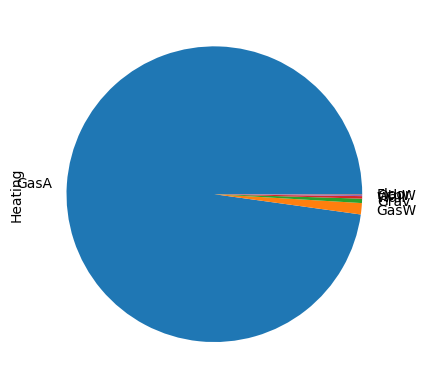

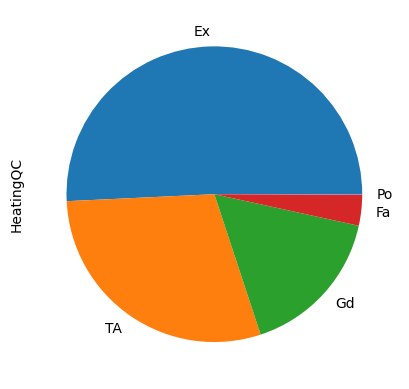

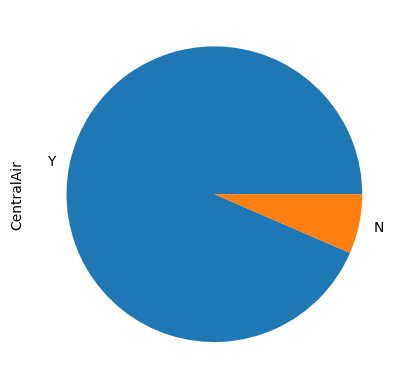

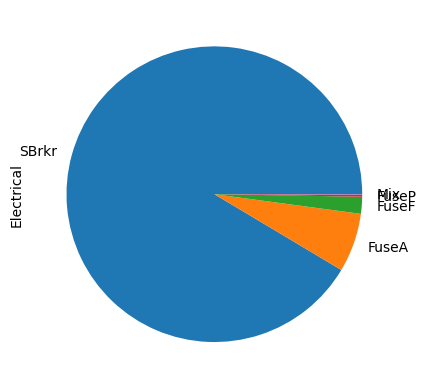

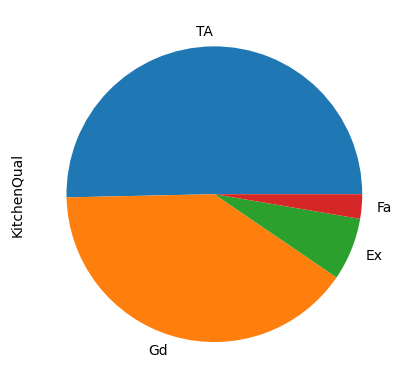

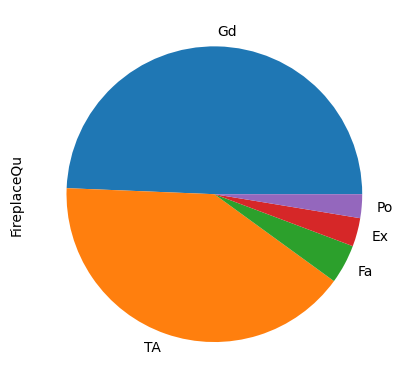

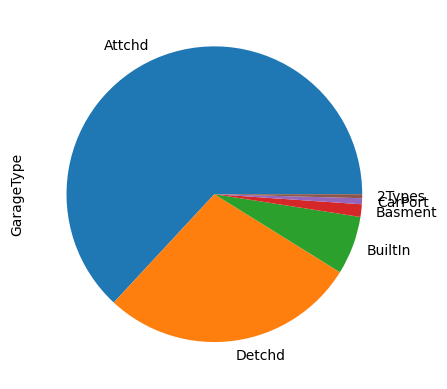

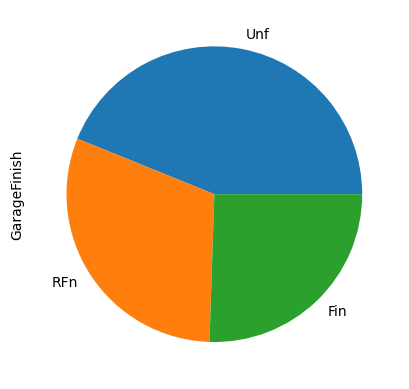

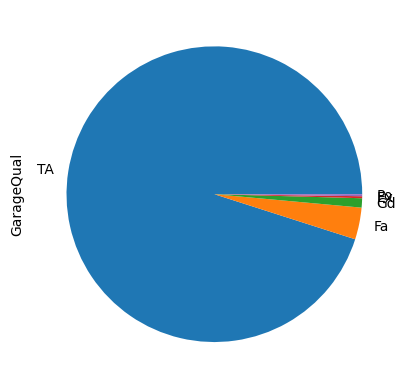

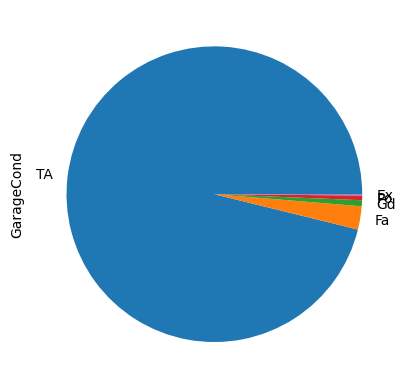

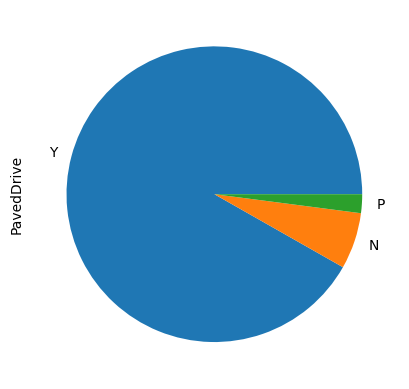

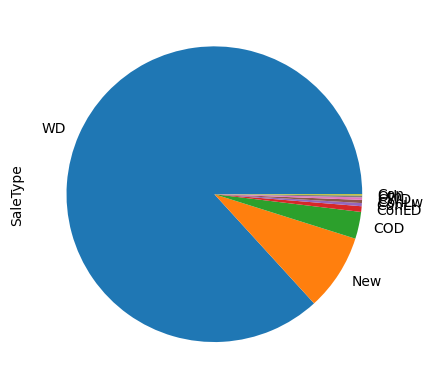

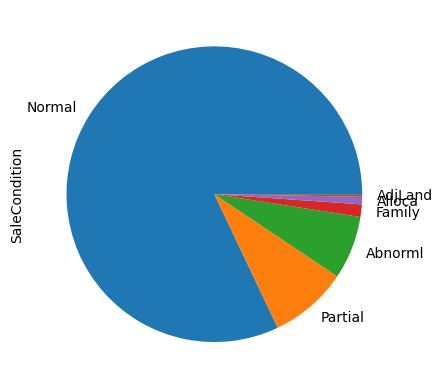

In [ ]:
#recherche de colonnes non équilibrer
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie(label = col)


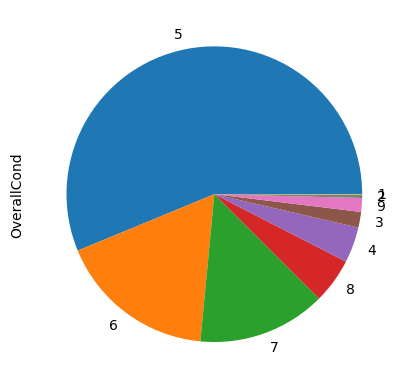

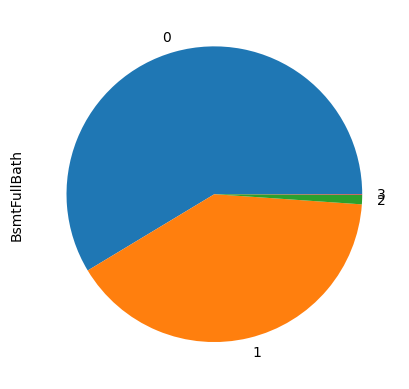

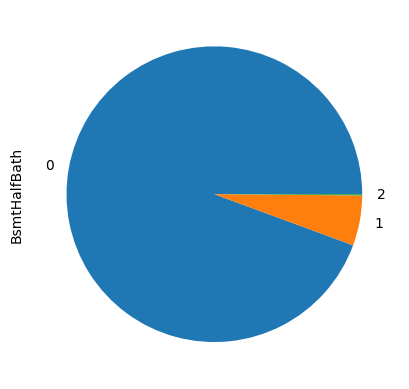

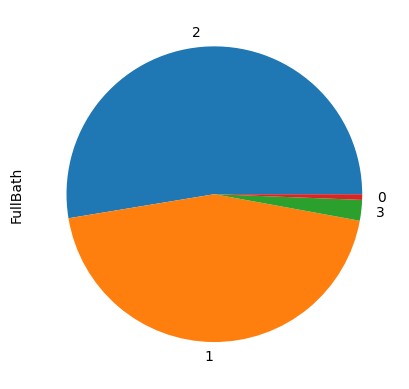

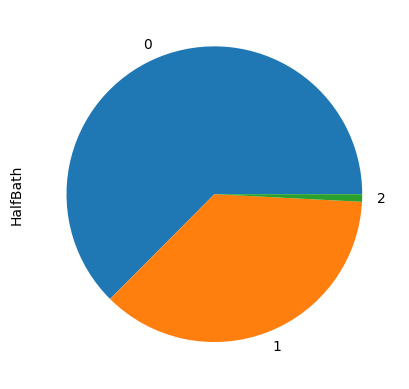

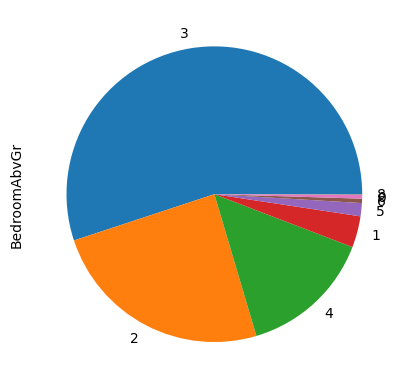

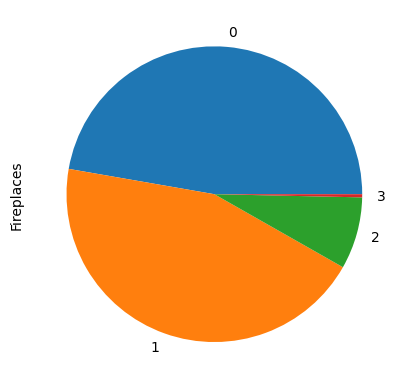

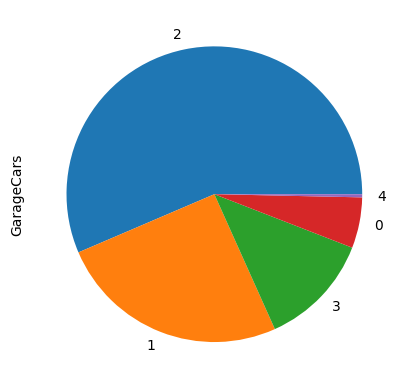

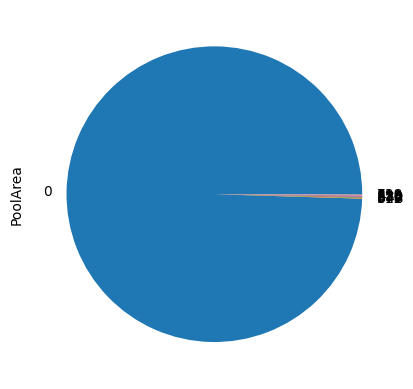

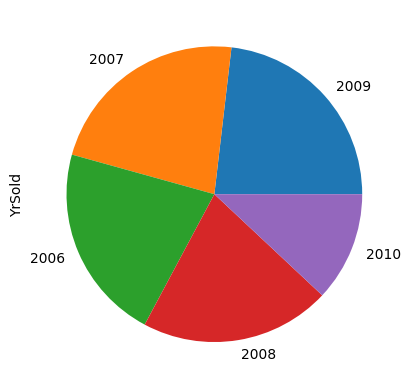

In [ ]:
#recherche de colonnes non équilibrer parmis les int catégorielle(val qualitative encodé)
for col in df.select_dtypes('int'):
   n = len(df[col].unique())
   if n < 10 :
      plt.figure()
      df[col].value_counts().plot.pie( label = col)


<ipython-input-15-79d401ac86e3>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


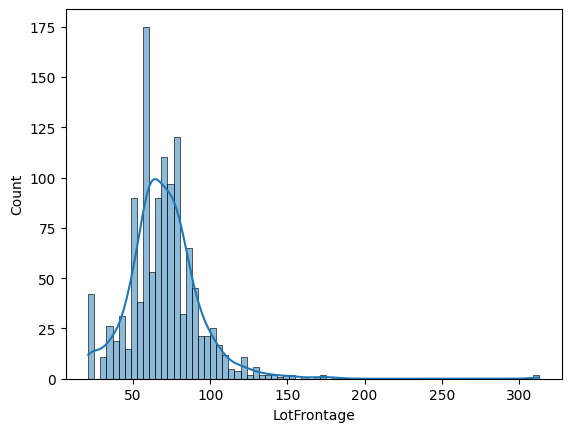

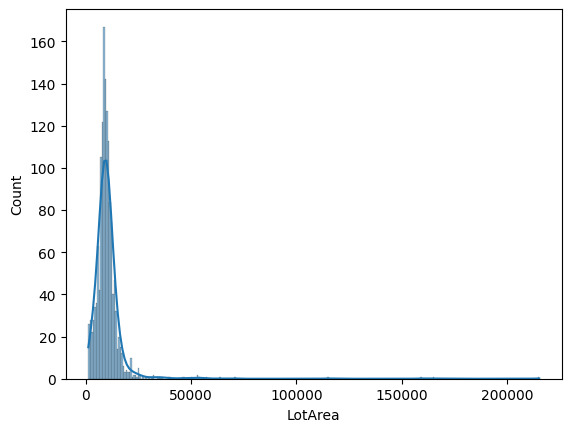

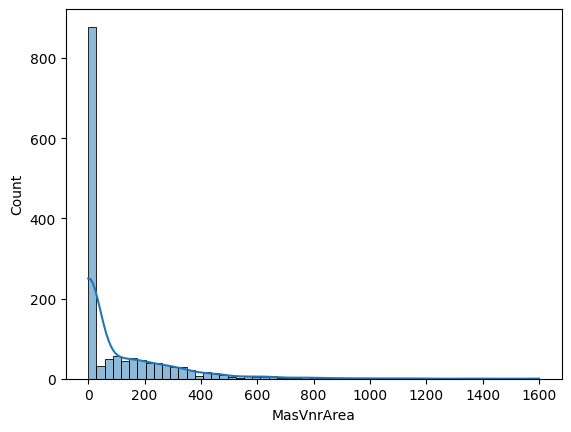

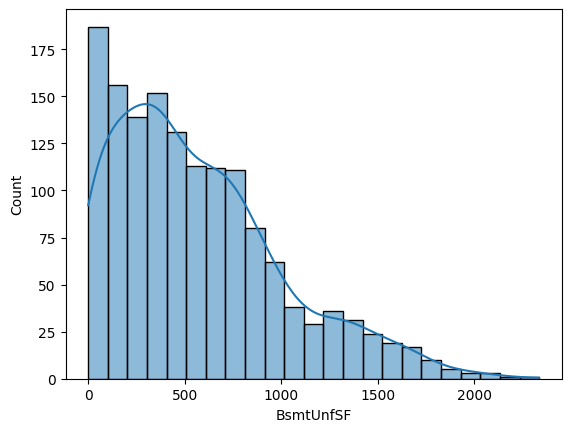

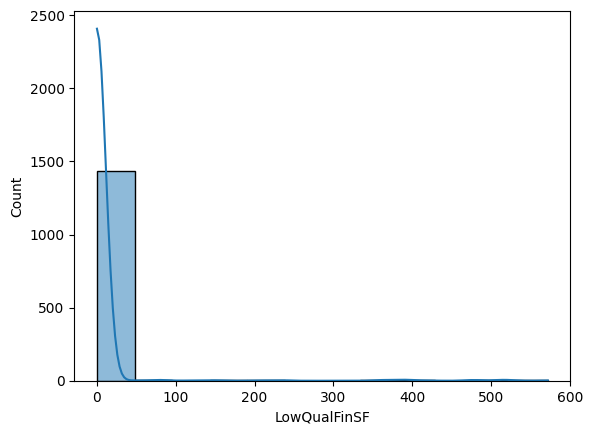

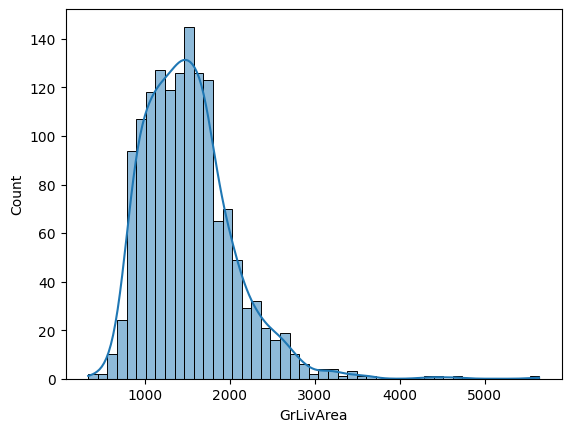

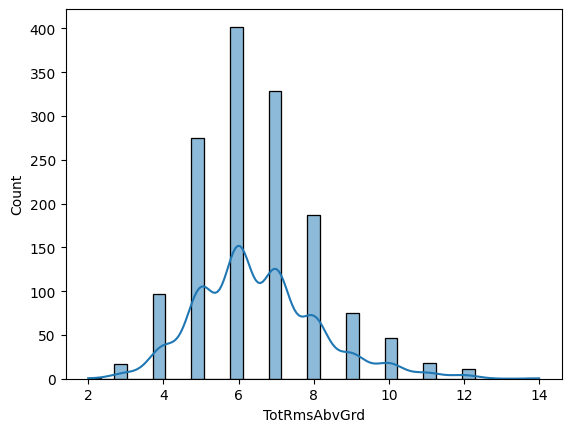

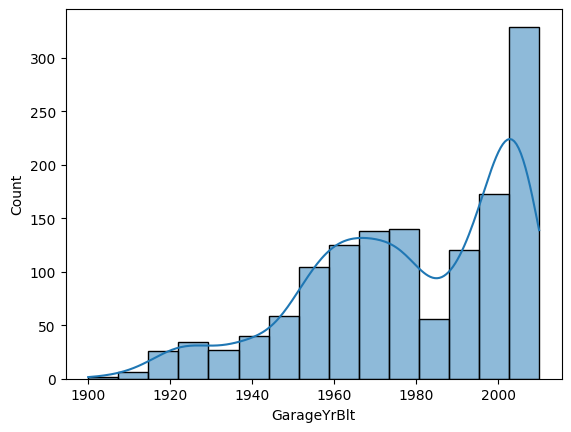

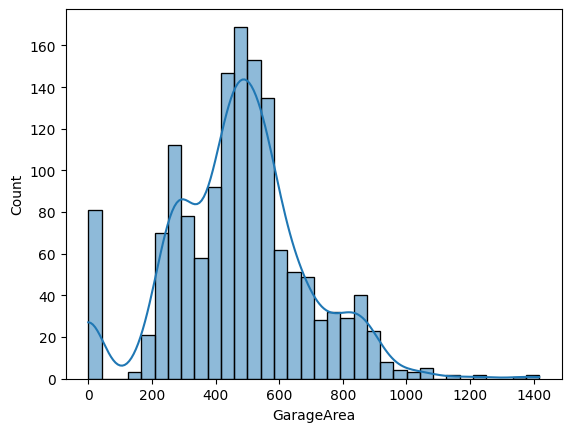

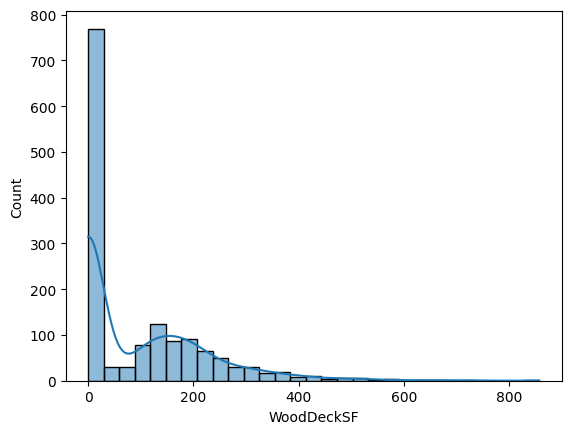

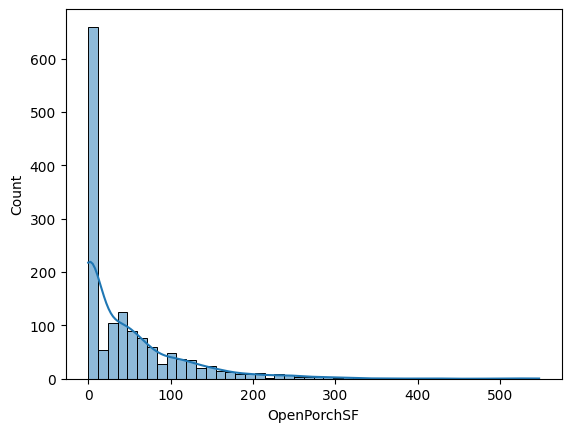

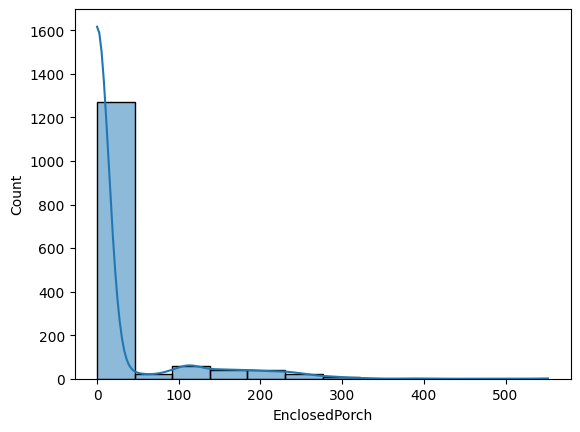

In [ ]:
for col in df.select_dtypes('number'):
    if len(df[col].unique()) > 10:
      plt.figure()
      sns.histplot(x=df[col], kde =True)

In [ ]:
#pour voir la répartition du prix
sns.histplot(df['SalePrice'], kde= True)

<Axes: xlabel='SalePrice', ylabel='Count'>

<Axes: xlabel='SalePrice'>

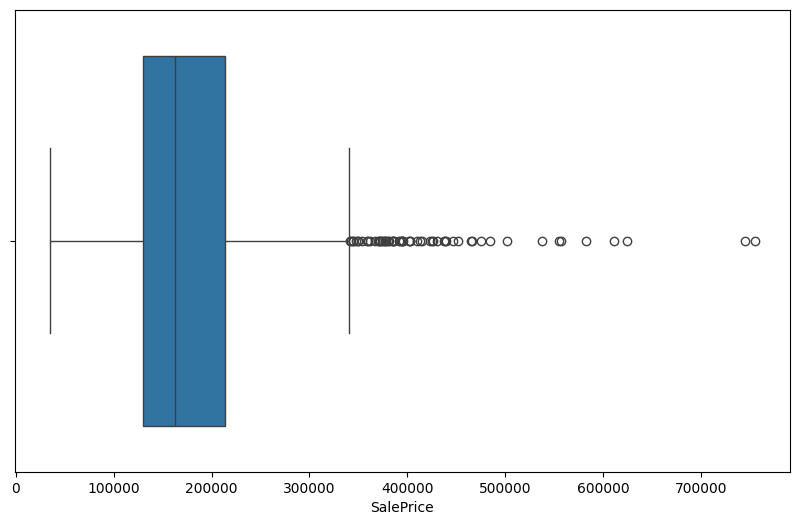

In [ ]:
#identifier les outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SalePrice'])

In [ ]:
#relation de corr entre les var et la target
df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Divion du DATA en divers groupe


In [ ]:
from itertools import combinations
similarities = []

# Comparer chaque paire unique de colonnes
for col1, col2 in combinations(df.columns, 2):
    try:
        sim = (df[col1] == df[col2]).mean()
        similarities.append((col1, col2, sim))
    except:
        continue

# Trier les similarités par taux décroissant
similarities.sort(key=lambda x: x[2], reverse=True)

# Afficher les plus élevées
print("🔝 Top 10 des colonnes les plus similaires (en %):")
for col1, col2, sim in similarities[:20]:
    print(f"{col1} ↔ {col2} : {sim * 100:.2f} % similaires")


🔝 Top 10 des colonnes les plus similaires (en %):
3SsnPorch ↔ PoolArea : 97.88 % similaires
LowQualFinSF ↔ PoolArea : 97.81 % similaires
LowQualFinSF ↔ 3SsnPorch : 96.64 % similaires
PoolArea ↔ MiscVal : 96.03 % similaires
3SsnPorch ↔ MiscVal : 94.86 % similaires
LowQualFinSF ↔ MiscVal : 94.79 % similaires
BsmtHalfBath ↔ PoolArea : 93.97 % similaires
BsmtHalfBath ↔ 3SsnPorch : 93.01 % similaires
LowQualFinSF ↔ BsmtHalfBath : 92.67 % similaires
ScreenPorch ↔ PoolArea : 91.64 % similaires
BsmtHalfBath ↔ MiscVal : 91.16 % similaires
GarageQual ↔ GarageCond : 90.41 % similaires
3SsnPorch ↔ ScreenPorch : 90.41 % similaires
CentralAir ↔ PavedDrive : 90.34 % similaires
LowQualFinSF ↔ ScreenPorch : 90.34 % similaires
ScreenPorch ↔ MiscVal : 88.84 % similaires
BsmtFinSF2 ↔ PoolArea : 88.29 % similaires
BsmtHalfBath ↔ ScreenPorch : 87.12 % similaires
BsmtFinSF2 ↔ 3SsnPorch : 87.05 % similaires
BsmtFinSF2 ↔ LowQualFinSF : 86.99 % similaires


## fusion de colonnes et suppressions selon le taaux de similarités

In [ ]:
#division en sous_data selon la signification
garage =[]
lot = []
BSM = []
for col in df :
  if 'Garage' in col :
    garage.append(col)
  elif 'Lot' in col :
    lot.append(col)
  elif 'Bsmt' in col :
    BSM.append(col)
lot_columns = df[lot]
garage_columns = df[garage]
BSM_columns = df[BSM]

##Inutile !!!
ordinal_rankings est le seul truc dont on a besoin pour l'encodage

In [ ]:
ordinal_object_columns = [
    'ExterQual',  # Qualité extérieure (Excellente à Faible)
    'ExterCond',  # État extérieur (Excellente à Très faible)
    'BsmtQual',   # Qualité du sous-sol (Excellente à Faible)
    'BsmtCond',   # État du sous-sol (Excellente à Très faible)
    'BsmtExposure',  # Exposition du sous-sol (Pleine, Partielle, Nulle)
    'BsmtFinType1',  # Type de finition du sous-sol (Récupérable, Non fini, etc.)
    'BsmtFinType2',  # Type de finition du sous-sol 2 (Récupérable, Non fini, etc.)
    'HeatingQC',  # Qualité du chauffage (Excellente à Très faible)
    'KitchenQual',  # Qualité de la cuisine (Excellente à Faible)
    'FireplaceQu',  # Qualité de la cheminée (Excellente à Très faible)
    'GarageFinish',  # Finition du garage (Finie, Non finie, etc.)
    'GarageQual',  # Qualité du garage (Excellente à Faible)
    'GarageCond',  # État du garage (Excellente à Très faible)
    'PavedDrive',  # Type d'allée pavée (Pavée, Non pavée, Partiellement pavée)
    'Street',  # Type de rue (Pavée, Gravillonnée)
    'Functional',  # Fonctionnalité de la maison (Normale à Modifiée)
    'Utilities',  # Utilisation des services publics (Complète à Limitée)
    'LandSlope'  # Pente du terrain (Douce à Sévère)
]
ordinal_columns = df[ordinal_object_columns]
for col in ordinal_object_columns:
    print(f"{col :-<50}  {df[col].unique()}")

ExterQual-----------------------------------------  ['Gd' 'TA' 'Ex' 'Fa']
ExterCond-----------------------------------------  ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual------------------------------------------  ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond------------------------------------------  ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure--------------------------------------  ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1--------------------------------------  ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2--------------------------------------  ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
HeatingQC-----------------------------------------  ['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual---------------------------------------  ['Gd' 'TA' 'Ex' 'Fa']
FireplaceQu---------------------------------------  [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageFinish--------------------------------------  ['RFn' 'Unf' 'Fin' nan]
GarageQual----------------------------------------  ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond--------------------

Remarque importante :
Si certaines de ces colonnes ont des valeurs manquantes (NaN) , remplis-les d’abord par une valeur comme 'Missing' ou 'None' (selon le contexte), avant l’encodage .
Vérifie que toutes les valeurs présentes dans tes colonnes sont bien incluses dans les listes de ordinal_rankings.


In [ ]:
onehot_columns = [
    'MSZoning',  # Zone résidentielle (RL, RM, etc.)
    'LotShape',  # Forme du lot (Régulier, IR1, IR2, IR3)
    'LandContour',  # Topographie du terrain (Plat, Pente, etc.)
    'LotConfig',  # Configuration du lot (Intérieur, Coin, Cul-de-sac)
    'Neighborhood',  # Quartier (CollgCr, Veenker, etc.)
    'Condition1',  # Condition de la propriété par rapport à la rue principale
    'Condition2',  # Autre condition de la propriété (près de l'artère)
    'BldgType',  # Type de bâtiment (Maison individuelle, Duplex, etc.)
    'HouseStyle',  # Style de la maison (2 étages, 1 étage, etc.)
    'RoofStyle',  # Type de toit (Pente, Mansarde, etc.)
    'RoofMatl',  # Matériau du toit (Composé, Métal, etc.)
    'Exterior1st',  # Matériau extérieur principal
    'Exterior2nd',  # Matériau extérieur secondaire
    'MasVnrType',  # Type de parement extérieur (Brique, Pierre, etc.)
    'Foundation',  # Type de fondation (Panneau, Bloc, etc.)
    'Heating',  # Type de chauffage (Gaz, Électrique, etc.)
    'CentralAir',  # Présence d'air central (Oui/Non)
    'Electrical',  # Type d'électricité (Système standard, Fusions, etc.)
    'GarageType',  # Type de garage (Attaché, Détaché, etc.)
    'SaleType',  # Type de vente (Neuve, Vente standard, etc.)
    'SaleCondition',  # Condition de vente (Normale, Abnormale, etc.)
    'MSSubClass',  # Type de construction de la maison (avec des catégories numériques) int de base*
]


Recommandation :
→ Les garder en tant que variables numériques.

Pas besoin d’encodage particulier (comme pour les catégorielles).
Elles sont déjà interprétables par les modèles .

🔧 Exception possible :
Si une variable a très peu de modalités distinctes (ex: HalfBath = 0, 1, 2), tu peux :

La transformer en catégorielle et faire un One-Hot Encoding , si ça améliore la performance du modèle.
Ou simplement faire un Label Encoding si tu veux la garder sous forme numérique mais traitée comme catégorielle ordonnée.

In [ ]:
ordinal_variables_int = [
    'OverallQual',    # Qualité globale (1–10)
    'OverallCond',    # État général (1–9)
    'BsmtFullBath',   # Nombre de SDB au sous-sol
    'BsmtHalfBath',   # Nombre de demi-SDB au sous-sol
    'FullBath',       # Nombre de SDB
    'HalfBath',       # Nombre de demi-SDB
    'BedroomAbvGr',   # Nombre de chambres
    'KitchenAbvGr',   # Nombre de cuisines
    'TotRmsAbvGrd',   # Nombre total de pièces
    'Fireplaces',     # Nombre de cheminées
    'GarageCars'      # Nombre de voitures dans le garage
]
ordinal_int = df[ordinal_variables_int]
for col in ordinal_variables_int:
    print(f"{col :-<50} ({len(df[col].unique())}) {df[col].unique()[:10]}")

OverallQual--------------------------------------- (10) [ 7  6  8  5  9  4 10  3  1  2]
OverallCond--------------------------------------- (9) [5 8 6 7 4 2 3 9 1]
BsmtFullBath-------------------------------------- (4) [1 0 2 3]
BsmtHalfBath-------------------------------------- (3) [0 1 2]
FullBath------------------------------------------ (4) [2 1 3 0]
HalfBath------------------------------------------ (3) [1 0 2]
BedroomAbvGr-------------------------------------- (8) [3 4 1 2 0 5 6 8]
KitchenAbvGr-------------------------------------- (4) [1 2 3 0]
TotRmsAbvGrd-------------------------------------- (12) [ 8  6  7  9  5 11  4 10 12  3]
Fireplaces---------------------------------------- (4) [0 1 2 3]
GarageCars---------------------------------------- (5) [2 3 1 0 4]


Conserver leur type int mais s'assurer que les modèles les traitent comme des ordres (pas comme des valeurs continues).

Encodage possible en catégoriel ordonné (ex. avec pd.Categorical(..., ordered=True)).

Continue à les traiter comme des variables numériques discrètes , sauf si le modèle en tire plus de sens sous forme catégorielle (à tester).
La création de TotalBath est un feature engineering pertinent.
Vérifie les corrélations entre TotRmsAbvGrd et GrLivArea : tu peux enlever l’une si redondance forte.

In [ ]:
temporal_columns = [
    'YearBuilt',      # Année de construction
    'YearRemodAdd',   # Année de rénovation
    'MoSold',         # Mois de la vente
    'YrSold'          # Année de la vente
]
temporal_int = df[temporal_columns]
for col in temporal_columns:
    print(f"{col :-<50} ({len(df[col].unique())}) {df[col].unique()[:10]}")

YearBuilt----------------------------------------- (112) [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939]
YearRemodAdd-------------------------------------- (61) [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965]
MoSold-------------------------------------------- (12) [ 2  5  9 12 10  8 11  4  1  7]
YrSold-------------------------------------------- (5) [2008 2007 2006 2009 2010]


transformer poolarea en haspool comme bcp de var

In [ ]:
numeric_columns = [
    'LotArea',        # Taille du lot
    'BsmtFinSF1',     # Surface sous-sol finie 1
    'BsmtFinSF2',     # Surface sous-sol finie 2
    'BsmtUnfSF',      # Surface sous-sol non finie
    'TotalBsmtSF',    # Surface totale du sous-sol
    '1stFlrSF',       # Surface du premier étage
    '2ndFlrSF',       # Surface du deuxième étage
    'LowQualFinSF',   # Surface de finitions de mauvaise qualité
    'GrLivArea',      # Surface habitable
    'GarageArea',     # Surface du garage
    'WoodDeckSF',     # Surface du deck en bois
    'OpenPorchSF',    # Surface du porche ouvert
    'EnclosedPorch',  # Surface du porche fermé
    '3SsnPorch',      # Surface du porche 3 saisons
    'ScreenPorch',    # Surface du porche grillagé
    'PoolArea',       # Surface de la piscine
    'MiscVal',        # Valeur de divers éléments (ex. piscine, etc.)
    'LotFrontage',
    'MasVnrArea',
    'GarageYrBlt',
    ]


ordinal_rankings est le seul truc on a besoin pour l'encodage

In [ ]:
ordinal_rankings = {
    'ExterQual': ['Fa', 'TA', 'Gd', 'Ex'],  # Qualité extérieure : Faible → Excellente
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # État extérieur : Mauvais → Excellent
    'BsmtQual': ['Fa', 'TA', 'Gd', 'Ex'],  # Qualité du sous-sol : Faible → Excellente
    'BsmtCond': ['Po', 'Fa', 'TA', 'Gd'],  # État du sous-sol : Très mauvais → Bon
    'BsmtExposure': ['No', 'Mn', 'Av', 'Gd'],  # Exposition : Aucune → Excellente
    'BsmtFinType1': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # Type de finition zone 1 : Non aménagé → Luxueux
    'BsmtFinType2': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # Idem que BsmtFinType1
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Qualité du chauffage : Très faible → Excellence
    'KitchenQual': ['Fa', 'TA', 'Gd', 'Ex'],  # Qualité de la cuisine : Faible → Excellente
    'FireplaceQu': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Qualité cheminée : Très mauvaise → Excellente
    'GarageFinish': ['Unf', 'RFn', 'Fin'],  # Finition garage : Non fini → Fini
    'GarageQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Qualité garage : Très mauvaise → Excellente
    'GarageCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # État garage : Très mauvais → Excellent
    'PavedDrive': ['N', 'P', 'Y'],  # Type d'allée : Non pavée → Partiellement → Entièrement
    'Street': ['Grvl', 'Pave'],  # Type de rue : Gravillonnée → Pavée
    'Functional': ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],  # Fonctionnalité maison : Sévèrement → Normalement fonctionnelle
    'Utilities': ['NoSeWa', 'NoSewr', 'AllPub'],  # Services publics : Sans égouts → Tous disponibles
    'LandSlope': ['Sev', 'Mod', 'Gtl']  # Pente du terrain : Forte → Douce
}

In [ ]:
#creation d'un dataset pour le preprocessing
df_encoded = df.copy()

In [ ]:
#Encodage des variables Nominal
from sklearn.preprocessing import OneHotEncoder
def one_hot_encode_columns(df, columns):
    global df_encoded
    df_encoded = pd.get_dummies(df_encoded, columns=columns, drop_first=True)
    return df_encoded
df_encoded = one_hot_encode_columns(df, onehot_columns)

In [ ]:
#Encodage des colonnes ordinales
def encode_ordinal_rankings(df, rankings_dict):
    global df_encoded
    for col, order in rankings_dict.items():
        if col in df_encoded.columns:
            mapping = {category: rank for rank, category in enumerate(order)}
            df_encoded[col] = df_encoded[col].map(mapping)
    return df_encoded
df_encoded = encode_ordinal_rankings(df, ordinal_rankings)

# Encodage des variables temporelles


In [ ]:
def encode_temporal_columns(df):

  # 1. Création de l'âge de la maison au moment de la vente
  df['AgeAtSale'] = df['YrSold'] - df['YearBuilt']

  # 2. Création du temps depuis la dernière rénovation
  df['AgeSinceRemodel'] = df['YrSold'] - df['YearRemodAdd']

  # 3. Variable binaire indiquant si la maison a été rénovée
  df['HasRemodeled'] = (df['YearRemodAdd'] != df['YearBuilt']).astype(int)

  # 4. Encodage cyclique du mois de vente (MoSold) pour capturer la saisonnalité
  df['MoSold_sin'] = np.sin(2 * np.pi * df['MoSold'] / 12)
  df['MoSold_cos'] = np.cos(2 * np.pi * df['MoSold'] / 12)

  # 5. Transformation de YrSold en variable catégorielle (si utilisé comme facteur temporel brut)
  df['YrSold'] = df['YrSold'].astype('category')

  # 6. Optionnel : suppression des colonnes originales si elles ne sont plus nécessaires
  df.drop(['YearBuilt', 'YearRemodAdd', 'MoSold'], axis=1, inplace=True)
  return df


df_encoded = encode_temporal_columns(df_encoded)

In [ ]:
df_encoded.shape


(1460, 210)

In [ ]:
def imputation(df):
  pass
  return df

In [ ]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [ ]:
X_train.head()

LotFrontage  LotArea  Street  Utilities  LandSlope  OverallQual  \
Id                                                                      
255          70.0     8400       1          2          2            5   
1067         59.0     7837       1          2          2            6   
639          67.0     8777       1          2          2            5   
800          60.0     7200       1          2          2            5   
381          50.0     5000       1          2          2            5   

      OverallCond  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
Id                                                                        
255             6         0.0          1          3       1.0       2.0   
1067            7         0.0          2          2       2.0       2.0   
639             7         0.0          1          2       0.0       2.0   
800             7       252.0          1          2       2.0       2.0   
381             6         0.0          1          2       1.0       2.0   

      BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
Id                                                                       
255            0.0           2.0         922           0.0           0   
1067           0.0           0.0           0           0.0           0   
639            0.0           0.0           0           0.0           0   
800            0.0           4.0         569           0.0           0   
381            0.0           1.0         218           0.0           0   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                          
255         392         1314          2      1314         0             0   
1067        799          799          3       799       772             0   
639         796          796          3       796         0             0   
800         162          731          4       981       787             0   
381         808         1026          2      1026       665             0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                              
255        1314             1             0         1         0             3   
1067       1571             0             0         2         1             3   
639         796             0             0         1         0             2   
800        1768             1             0         1         1             3   
381        1691             0             0         2         0             3   

      KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
Id                                                                      
255              1            1             5           6           0   
1067             1            1             7           6           1   
639              1            1             4           6           0   
800              1            2             7           6           2   
381              1            2             6           6           1   

      FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  GarageArea  \
Id                                                                     
255           NaN       1957.0           1.0           1         294   
1067          2.0       1993.0           1.0           2         380   
639           NaN          NaN           NaN           0           0   
800           2.0       1939.0           0.0           1         240   
381           3.0       1924.0           0.0           1         308   

      GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
Id                                                                  
255          2.0         2.0           2         250            0   
1067         2.0         2.0           2           0           40   
639          NaN         NaN           1        

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
# Création du modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraînement
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Prédiction
y_pred = model.predict(X_val)

# Évaluation
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

MAE  : 17222.27
RMSE : 28609.41
R²   : 0.8933


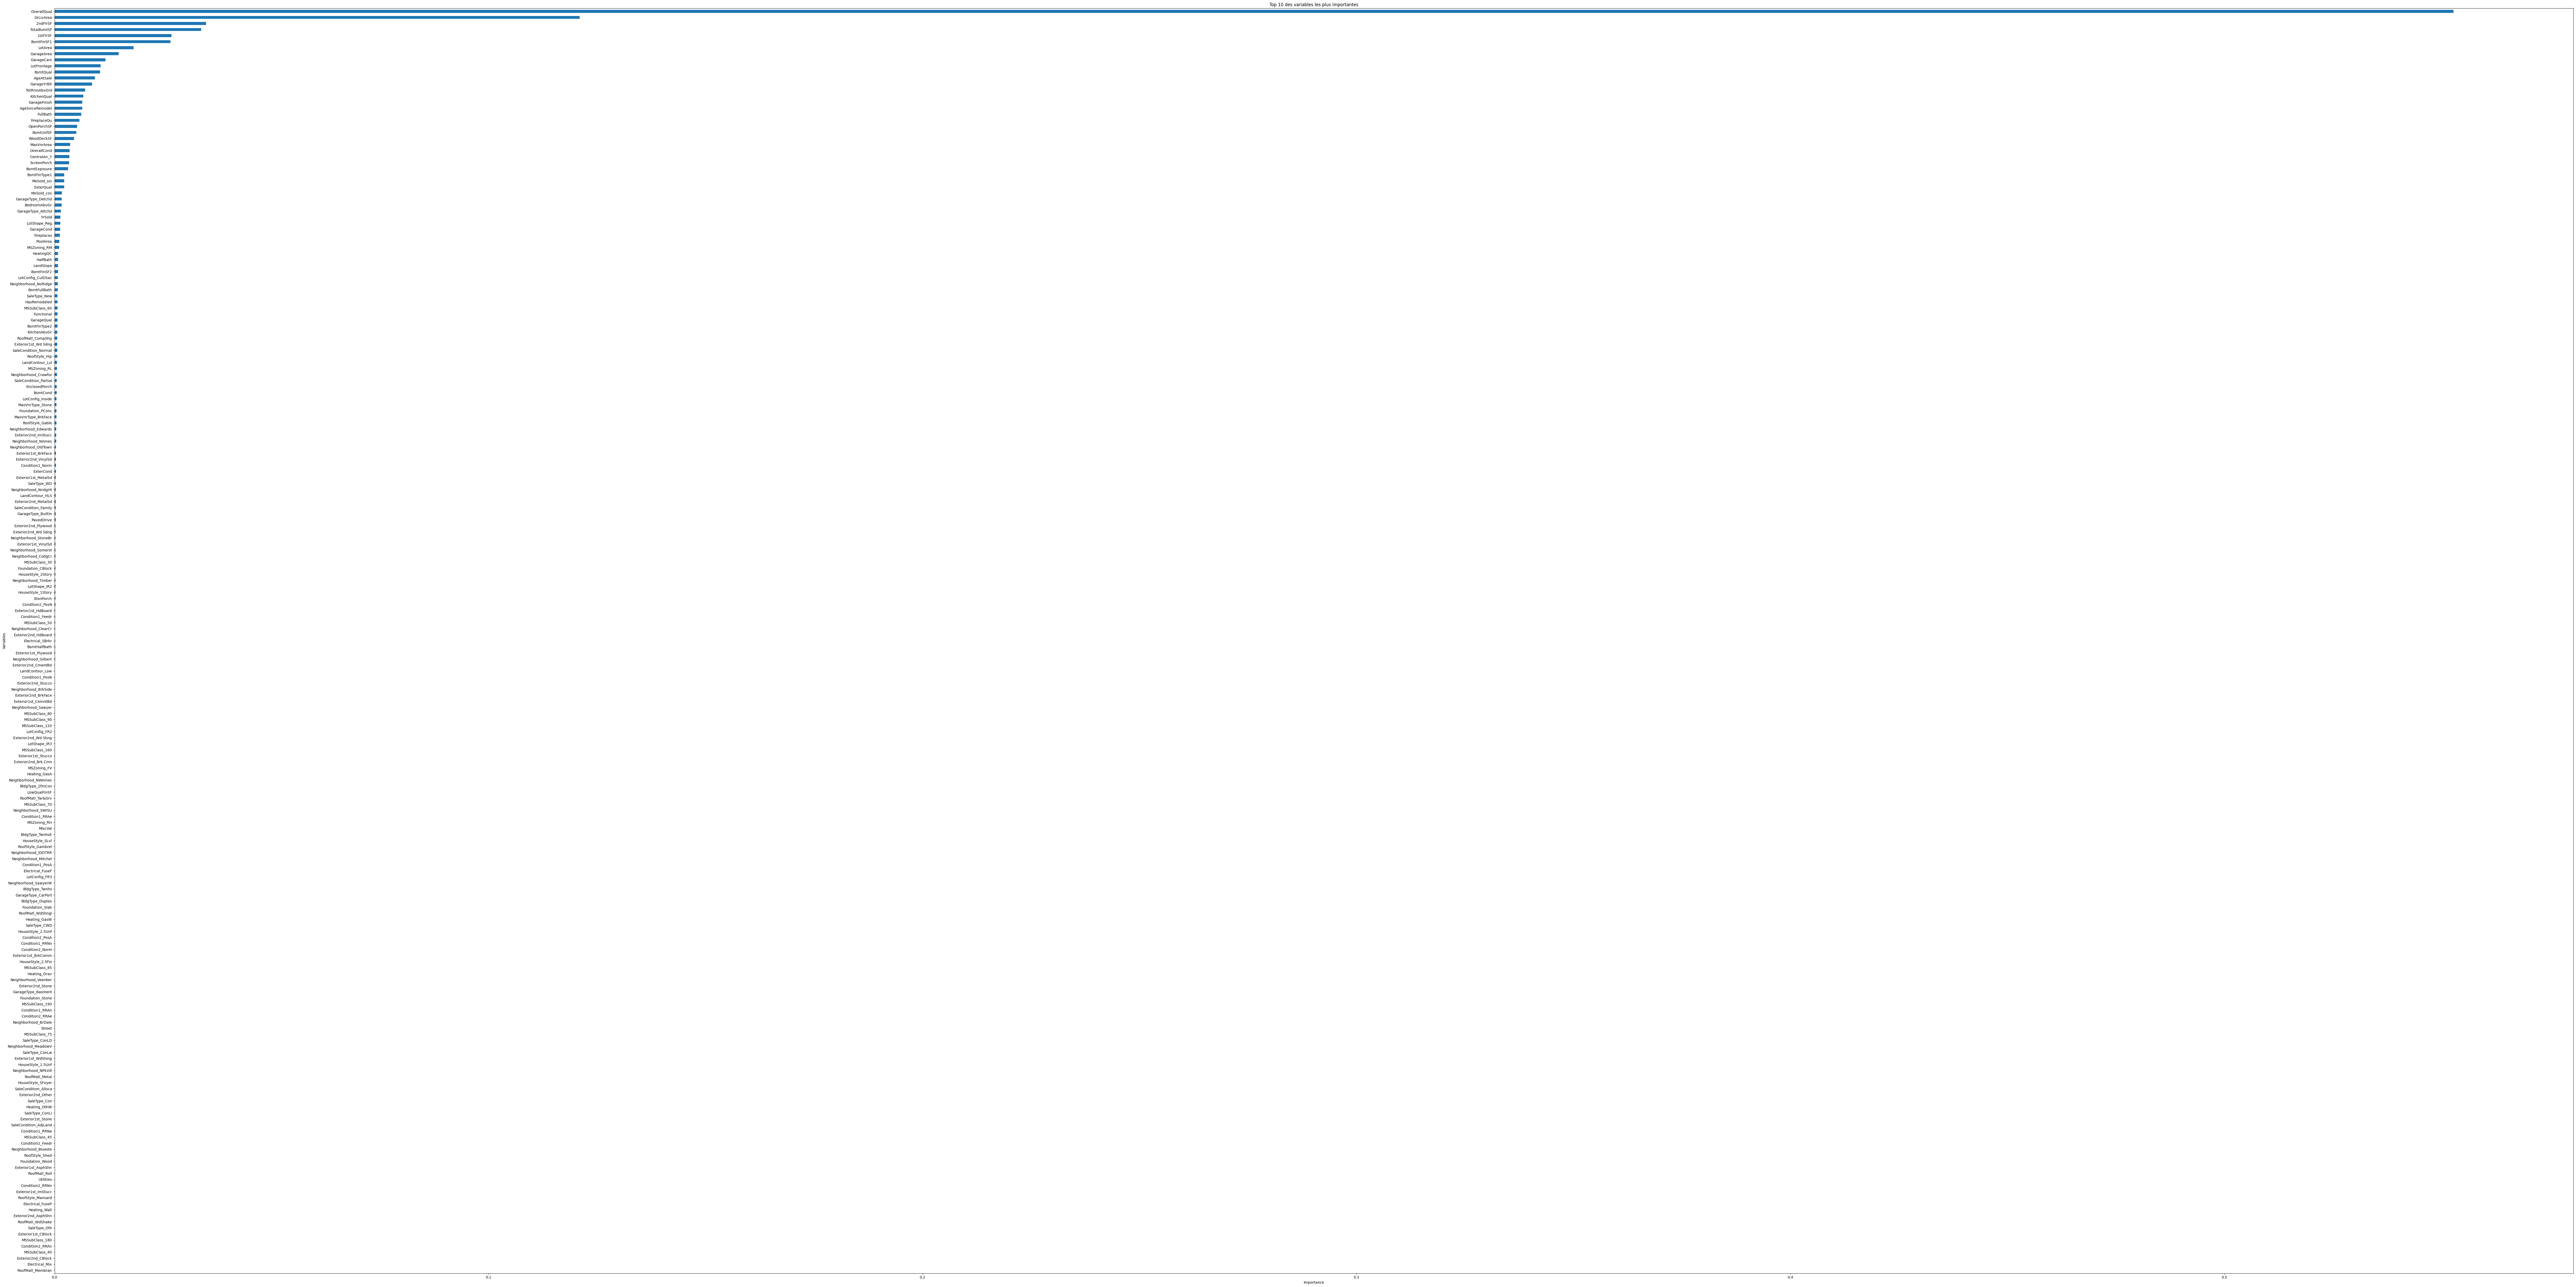

In [ ]:
# Récupération des importances
importances = model.feature_importances_
features = X_train.columns

# Création d'une série pour trier
feat_importances = pd.Series(importances, index=features).sort_values()

# Affichage graphique
plt.figure(figsize=(100, 50))
feat_importances.plot(kind='barh')
plt.title("Top 10 des variables les plus importantes")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()